# Working with `auxi`'s Heat Transfer `naturalconvection.IsothermalFlatSurface` Models

## Purpose
The purpose of this example is to introduce and demonstrate the `IsothermalFlatSurface` class in `auxi`'s `naturalconvection` module.

## Background
It is often needed to calculate heat losses from surfaces exposed to natural convection conditions. These calculations requires the determination of a heat transfer coefficient. The coefficients are based on empirical correlations determined from experimental measurements. To save the time required to locate the appropriate correlations from literature, `auxi`'s `naturalconvection` module provides models to make doing these calculations faster, easier, and more reliable.

## Items Covered
The following items in `auxi` are discussed and demonstrated in this example:
* `auxi.tools.transportphenomena.heattransfer.naturalconvection.IsothermalFlatSurface`

## Example Scope
In this example we will address the following aspects:
1. Importing the `IsothermalFlatSurface` class.
2. Introduction to `IsothermalFlatSurface` regions mapping diagram.
3. Using `Nu_x` to calculate the local Nusselt number.
4. Using `Nu_L` to calculate the average Nusselt number.
5. Using `h_x` to calculate the local heat transfer coefficient..
6. Using `h_L` to calculate the average heat transfer coefficient.

## Demonstrations

### Importing the `IsothermalFlatSurface` Class
Before you can use that `IsothermalFlatSurface` class, you need to import it from `auxi`. We also need to import a material that we can use as the fluid for our calculations. In this case we will use air, and import it from the `materialphysicalproperties.gases` module.

In [1]:
from auxi.tools.transportphenomena.heattransfer.naturalconvection import IsothermalFlatSurface
from auxi.tools.materialphysicalproperties.gases import air

You are now ready to use the `IsothermalFlatSurface` class.

### Introduction to `IsothermalFlatSurface` Regions
The different correlations used in the `IsothermalFlatSurface` model apply to specific regions in the 2D Ra-theta coordinate system. To gain some insight into which regions are covered with proven correlations (grey), and which are covered by interpolation or extrapolation (red), these regions can be plotted as follows.

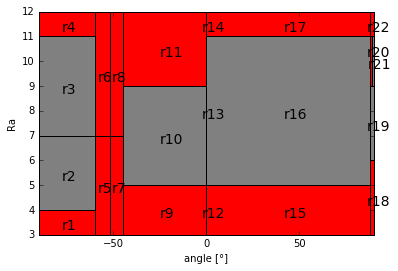

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

model = IsothermalFlatSurface(air, True, None)
model.plot_regions()

### Doing Convection Heat Transfer Calculations
Now we can use the model and the fluid material to estimate the heat transferred from a flat surface.

In [4]:
# create an instance of the model, with air as fluid
model = IsothermalFlatSurface(air)

# define the heat transfer conditions
L = 0.4  # [m] length of heat transfer surface
w = 0.5  # [m] width of heat transfer surface
A = L*w  # [m2] area of heat transfer surface
θ = 55.0  # [°] angle of heat transfer surface with vertical
Ts = 313.0  # [K] surface temperature
Tf = 283.0  # [K] fluid temperature

# calculate the heat transfer coefficient parameters
Nu_x = model.Nu_x(L, θ, Ts, T=Tf)  # local Nusselt number
Nu_L = model.Nu_L(L, θ, Ts, T=Tf)  # average Nusselt number
h_x = model.h_x(L, θ, Ts, T=Tf)  # [W/m2/K] local heat transfer coefficient
h_L = model.h_L(L, θ, Ts, T=Tf)  # [W/m2/K] average heat transfer coefficient
q_x = h_x * A * (Ts - Tf)  # [W/m2]
q_L = h_L * A * (Ts - Tf)  # [W/m2]

# print the results
print('Nu_x', Nu_x)
print('Nu_L', Nu_L)
print('h_x', h_x, "W/m2/K")
print('h_L', h_L, "W/m2/K")
print('q_x', q_x, "W")
print('q_L', q_L, "W")

Nu_x 60.9052517967
Nu_L 81.2070023955
h_x 4.00230076002 W/m2/K
h_L 5.33640101336 W/m2/K
q_x 24.0138045601 W
q_L 32.0184060801 W
